<center><h1>SVM for image classification using BoW</h1></center>



In [ ]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [ ]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [ ]:
weight_class = {c: nb/y.shape[0] for c, nb in enumerate(np.bincount(y))}

#Le set n'est pas équilibré la classe 6 (>400sample) est bcp plus representé que les classes 9,10,12 

Split the dataset into a train & test set:

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Then a validation set from the train set:

In [ ]:
X_train , X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.8746)


Let's KFold over different values of `C`:

In [ ]:
C_values = [10**int(i) for i in np.arange(-4,2)]
accuracies = []

svc = SVC(kernel='linear')
print(len(C_values))
for c in C_values:
  print(f'Training SVM with C={c}')
  svc.set_params(C=c)
  # Fit on sub-train set
  svc.fit(X_train,y_train)
  # Evaluate on val set
  acc = svc.score(X_val,y_val)
  print(f'--> accuracy = {acc}')
  accuracies.append(acc)

6
Training SVM with C=0.0001
--> accuracy = 0.6822222222222222
Training SVM with C=0.001
--> accuracy = 0.7533333333333333
Training SVM with C=0.01
--> accuracy = 0.7355555555555555
Training SVM with C=0.1
--> accuracy = 0.7355555555555555
Training SVM with C=1
--> accuracy = 0.7355555555555555
Training SVM with C=10
--> accuracy = 0.7355555555555555


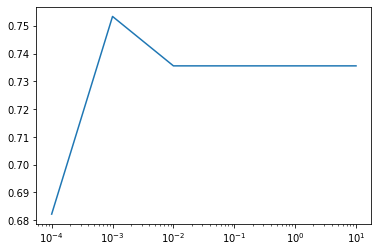

In [ ]:
#Relation between `c` and the accuracy
plt.xscale('log')
plt.plot(C_values,accuracies)

In [ ]:
#Fit on the whole train set, evaluate on the test set 
c = C_values[np.argmax(accuracies)]
svc.set_params(C=c)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.750278706800446

Do the same with different kernel values, and different decision functions:

Training SVM with kernel=linear
--> accuracy = 0.7533333333333333
Training SVM with kernel=rbf
--> accuracy = 0.08
Training SVM with kernel=poly
--> accuracy = 0.12
Training SVM with kernel=sigmoid
--> accuracy = 0.08
score test on test set = 0.7536231884057971 with kernel linear


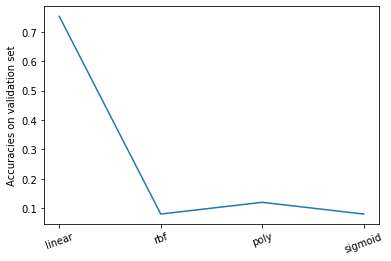

In [ ]:
kernels = ['linear','rbf','poly','sigmoid']
accuracies_kernel = []

svc = SVC(C=c)
for k in kernels:
  print(f'Training SVM with kernel={k}')

  svc.set_params(kernel=k)
  # Fit on sub-train set
  svc.fit(X_train,y_train)
  # Evaluate on val set
  acc_k = svc.score(X_val,y_val)
  print(f'--> accuracy = {acc_k}')
  accuracies_kernel.append(acc_k)

plt.xticks(np.arange(4),kernels,rotation=20)
plt.ylabel("Accuracies on validation set")
plt.plot(accuracies_kernel)

k = kernels[np.argmax(accuracies_kernel)]
svc.set_params(kernel=k)
svc.fit(X_train,y_train)

print(f'score test on test set = {svc.score(X_test,y_test)} with kernel {k}')

Training SVM with decision function =ovo
--> accuracy = 0.7533333333333333
Training SVM with decision function =ovr
--> accuracy = 0.7533333333333333
score test best decision function on test set = 0.7536231884057971


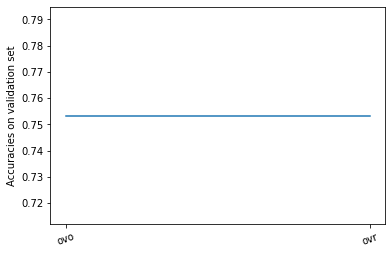

In [ ]:
decision_functions = ['ovo','ovr']
accuracies_decisions = []
svc = SVC(C=c,kernel=k)

for df in decision_functions:
  print(f'Training SVM with decision function ={df}')

  svc.set_params(decision_function_shape=df)
  # Fit on sub-train set
  svc.fit(X_train,y_train)
  # Evaluate on val set
  acc_df = svc.score(X_val,y_val)
  print(f'--> accuracy = {acc_df}')
  accuracies_decisions.append(acc_df)


plt.xticks(np.arange(len(decision_functions)),decision_functions,rotation=20)
plt.ylabel("Accuracies on validation set")
plt.plot(accuracies_decisions)

df = decision_functions[np.argmax(accuracies_decisions)]
svc.set_params(decision_function_shape=df)
svc.fit(X_train,y_train)

print(f'score test best decision function on test set = {svc.score(X_test,y_test)}')

Text(0.5, 1.0, 'Validation score w.r.t decision function shape')

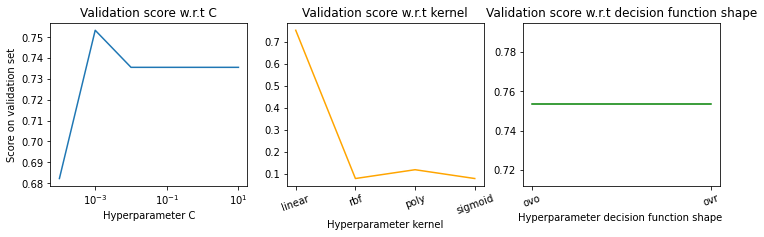

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(12,3))
#axe 0 : C 

axs[0].set_xscale('log')
axs[0].plot(C_values,accuracies)
axs[0].set_ylabel("Score on validation set")
axs[0].set_xlabel("Hyperparameter C")
axs[0].set_title("Validation score w.r.t C")
#axe 1 : Kernel

axs[1].set_xticks(np.arange(4))
axs[1].set_xticklabels(kernels,rotation=20)
axs[1].set_xlabel("Hyperparameter kernel")
axs[1].plot(accuracies_kernel,color='orange')
axs[1].set_title("Validation score w.r.t kernel")

#axe 2 : decision_function shape

axs[2].set_xticks(np.arange(len(decision_functions)))
axs[2].set_xticklabels(decision_functions,rotation=20)
axs[2].set_xlabel("Hyperparameter decision function shape ")
axs[2].plot(accuracies_decisions,color='green')
axs[2].set_title("Validation score w.r.t decision function shape")



In [ ]:
#on doit balancer les poids dans notre modele

weight = np.bincount(y)/y.shape[0]

svc = SVC(C=c, kernel=k, class_weight = 'balanced')

print(f'Training SVM with weight classes = {weight_class}')
# Fit on sub-train set
svc.fit(X_train,y_train)
# Evaluate on val set
acc = svc.score(X_val,y_val)
print(f'--> accuracy = {acc}')

svc.fit(X_train,y_train)

print(f'score test with weigthed classes on test set = {svc.score(X_test,y_test)}')

Training SVM with weight classes = {0: 0.05373467112597547, 1: 0.0802675585284281, 2: 0.07313266443701226, 3: 0.057971014492753624, 4: 0.06867335562987736, 5: 0.08338907469342252, 6: 0.09141583054626533, 7: 0.06510590858416945, 8: 0.07937569676700111, 9: 0.04793756967670011, 10: 0.048160535117056855, 11: 0.0693422519509476, 12: 0.046822742474916385, 13: 0.06443701226309922, 14: 0.07023411371237458}
--> accuracy = 0.76
score test with weigthed classes on test set = 0.750278706800446
